cpu
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.51e+00 | test_loss: 2.29e+00 | reg: 5.94e+01 | : 100%|█| 300/300 [00:50<00:00,  5.99


saving model version 0.1
MAE: 0.8489
MSE: 1.7357
MAPE: 1.8282
R²: 0.9991
RMSE: 1.3175
fixing (0,0,0) with sin, r2=0.9999988079071045, c=2
fixing (0,0,1) with x^0.5, r2=0.9998210072517395, c=2
fixing (0,0,2) with cos, r2=0.999987006187439, c=2
fixing (0,1,0) with exp, r2=0.9989357590675354, c=2
fixing (0,1,1) with 0, r2=0.0, c=0
fixing (0,1,2) with x, r2=1.000000238418579, c=1
fixing (0,2,0) with 0, r2=0.0, c=0
fixing (0,2,1) with 0, r2=0.0, c=0
fixing (0,2,2) with 0, r2=0.0, c=0
fixing (0,3,0) with 0, r2=0.0, c=0
fixing (0,3,1) with x, r2=0.9473995566368103, c=1
fixing (0,3,2) with cos, r2=0.9998044967651367, c=2
fixing (0,4,0) with 0, r2=0.0, c=0
fixing (0,4,1) with 0, r2=0.0, c=0
fixing (0,4,2) with x, r2=0.9999985694885254, c=1
fixing (0,5,0) with 0, r2=0.0, c=0
fixing (0,5,1) with x, r2=0.9806784987449646, c=1
fixing (0,5,2) with x, r2=0.9992677569389343, c=1
fixing (1,0,0) with 0, r2=0.0, c=0
fixing (1,0,1) with 0, r2=0.0, c=0
fixing (1,1,0) with x, r2=0.9863981604576111, c=1
fixi

2.267*x_4 + 0.639*x_6 + 88.897*sqrt(x_1 + 0.23) - 28.031

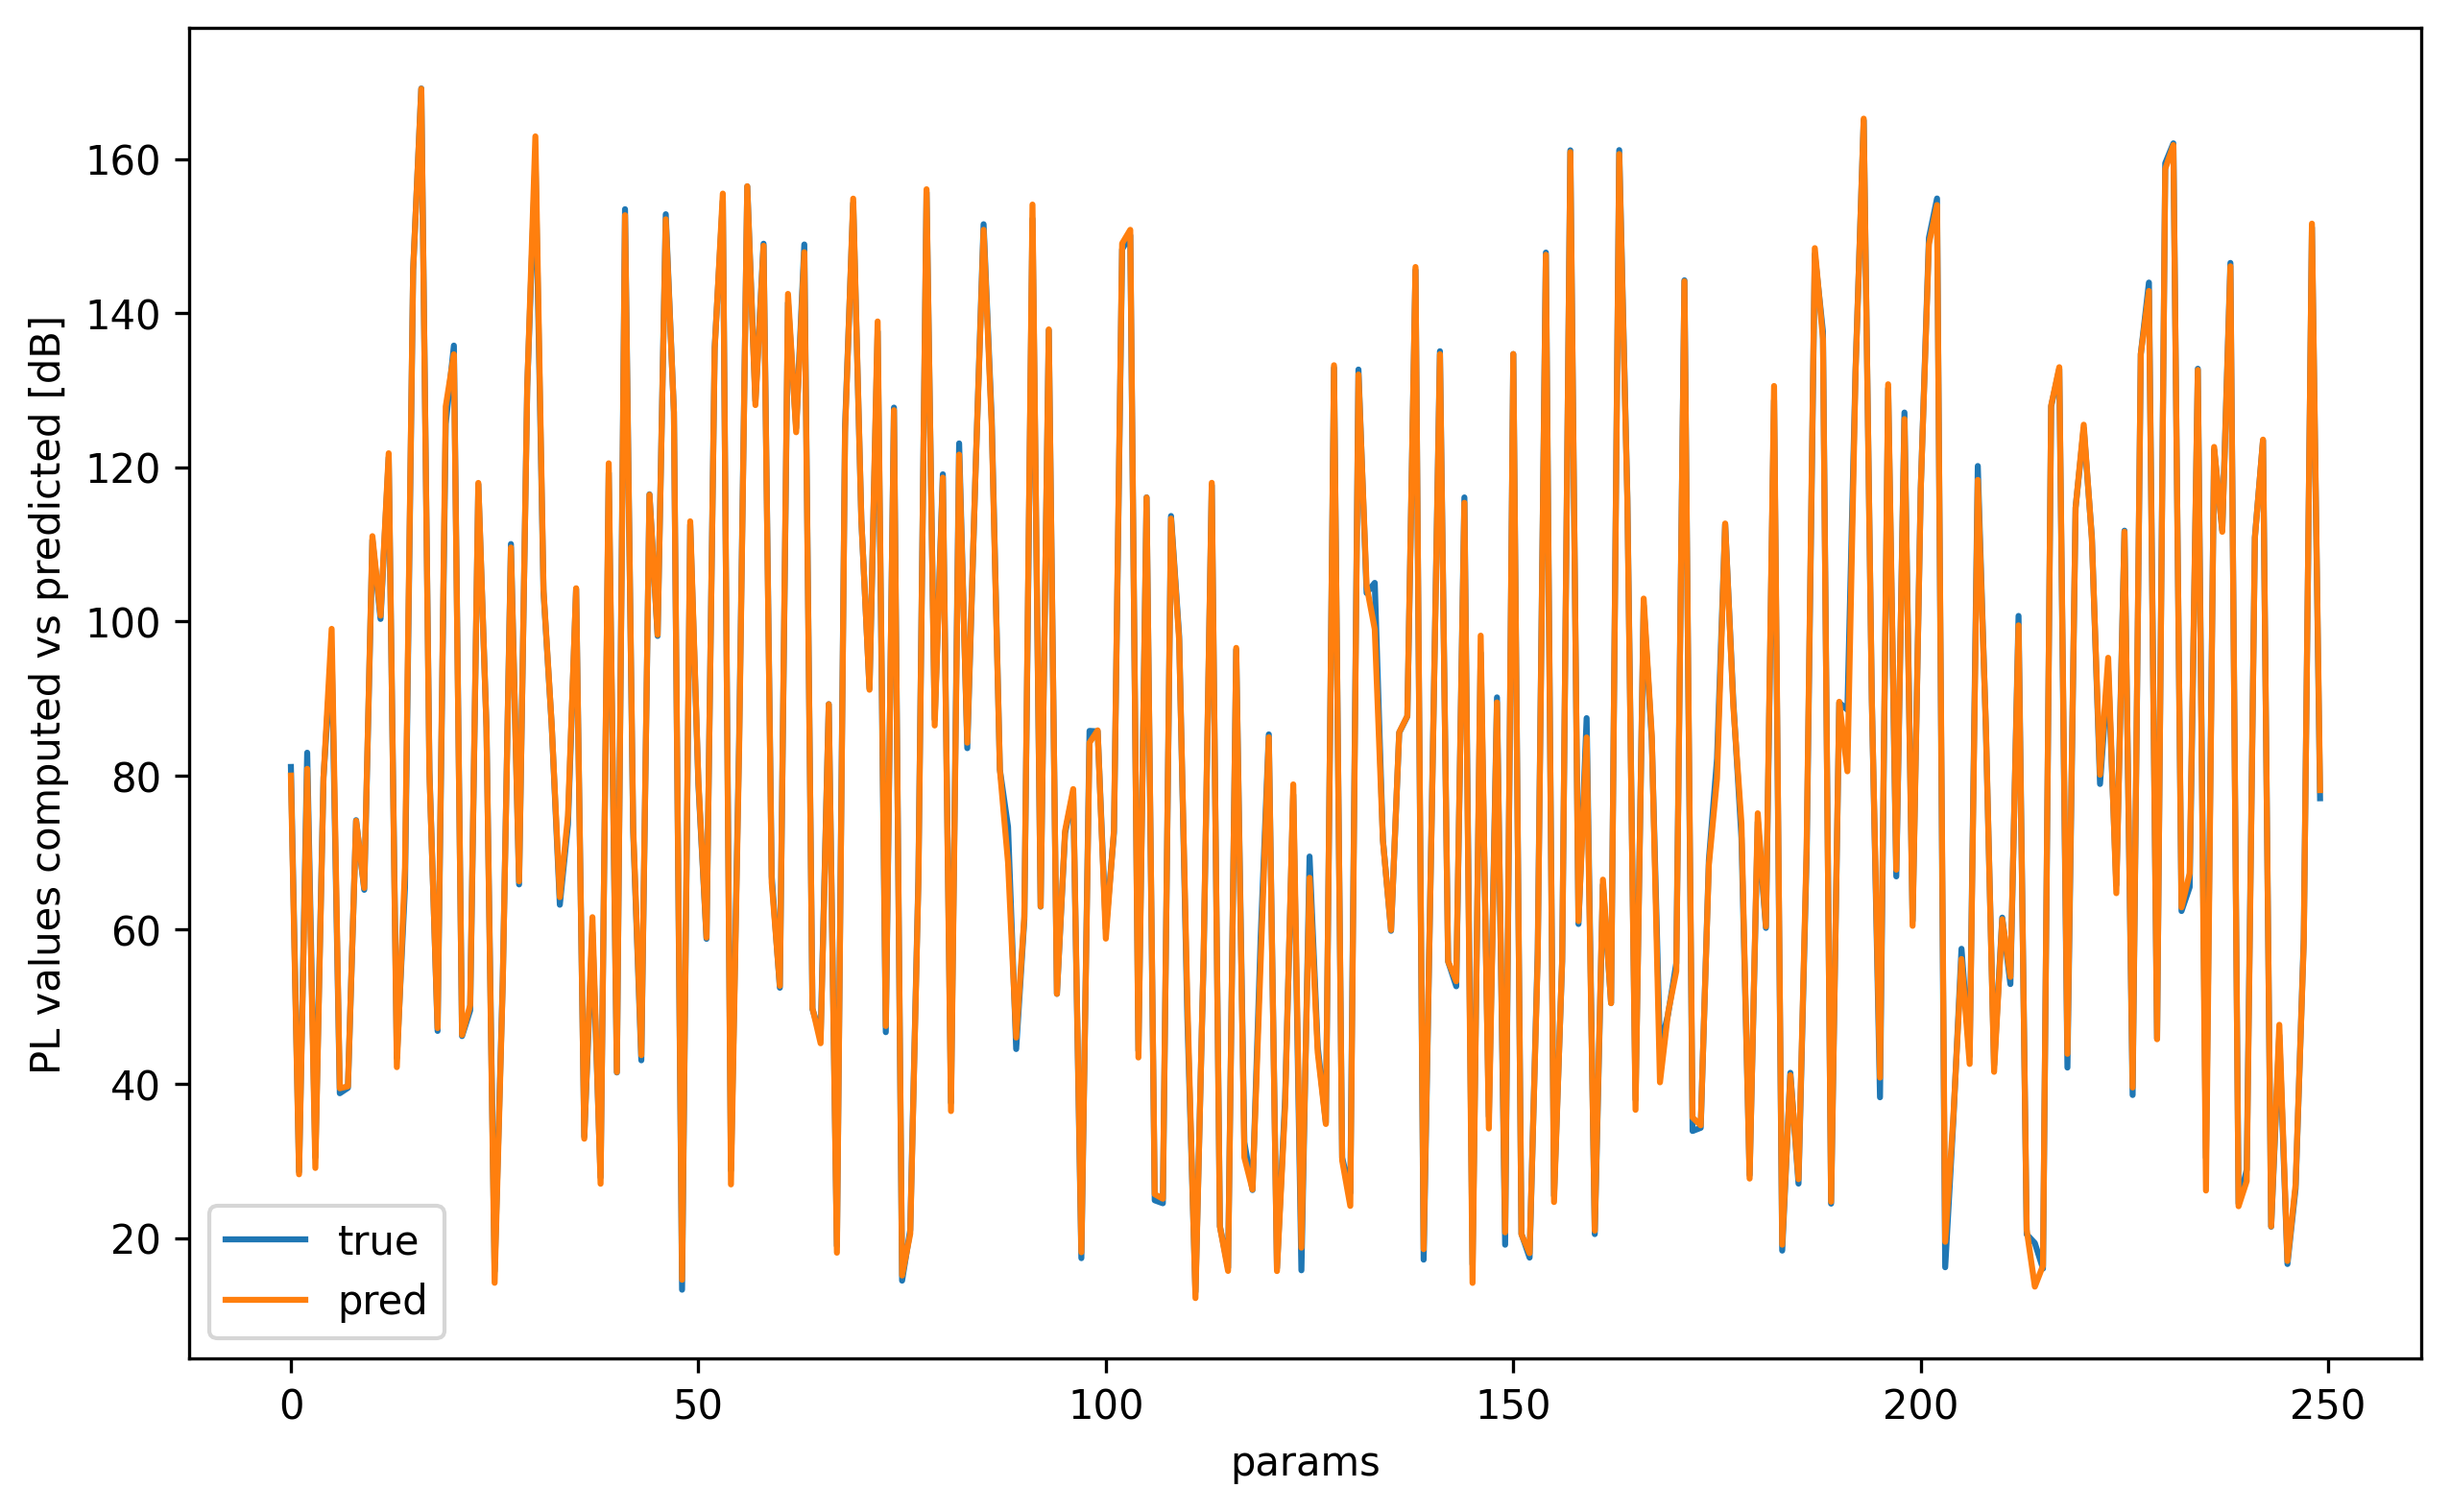

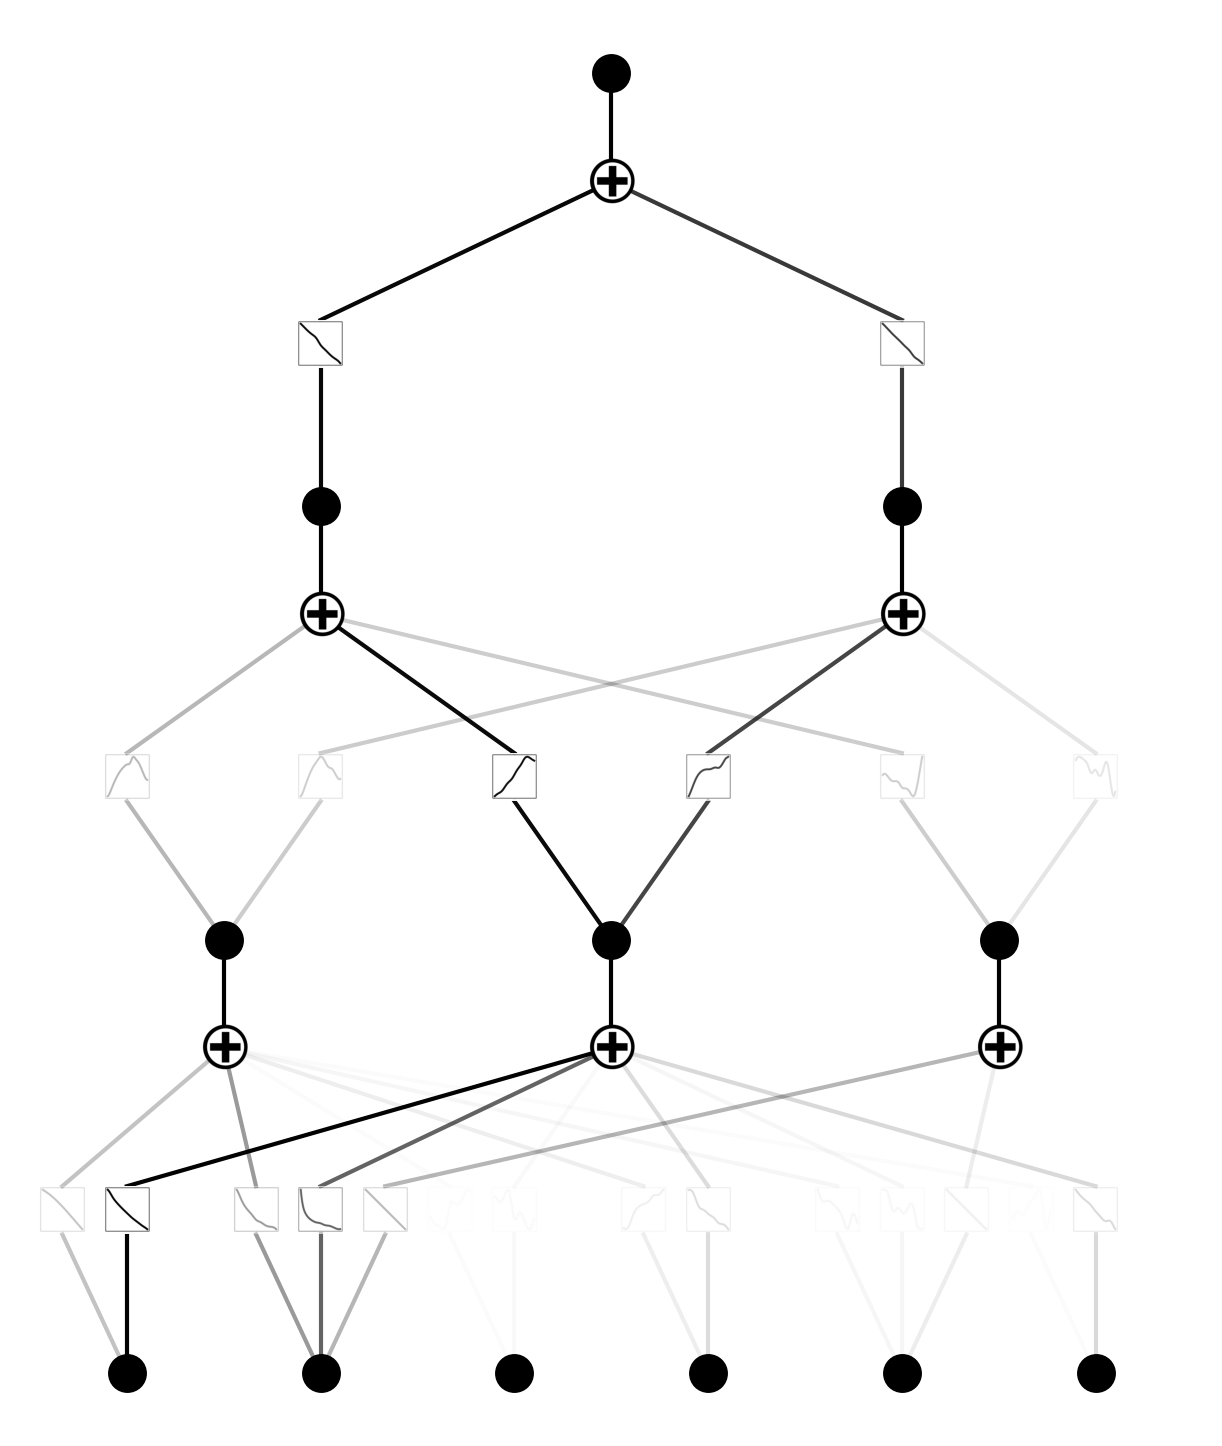

In [ ]:

from kan import *
import torch

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['figure.dpi'] = 300

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


def eval_kan(model_kan, test_data):
    y_true = test_data['test_label']
    with torch.no_grad():
        y_pred = model_kan(test_data['test_input'])
        
    y_true = y_true.detach().cpu().numpy().ravel()[:250]
    y_pred = y_pred.detach().cpu().numpy().ravel()[:250]
    time = range(len(y_true))

    # Plot the training and test losses.
    plt.plot(time, y_true)
    plt.plot(time, y_pred)
    plt.legend(['true', 'pred'])
    plt.ylabel('PL values computed vs predicted [dB]')
    plt.xlabel('params')


    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)

    mape_frac = mean_absolute_percentage_error(y_true, y_pred)
    mape = mape_frac * 100
    
    # Print results
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAPE: {mape:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")

    return mse, rmse, mae, mape, r2

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_gids_steps_lambda_loss(gids_size, steps, lam, metric, metric_name):
    """
    Plots a 3D scatter of gids_size vs steps vs train_loss, 
    with point color representing lambda.
    
    Parameters:
    - gids_size: array-like of shape (N,)
    - steps: array-like of shape (N,)
    - lam: array-like of shape (N,)
    - train_loss: array-like of shape (N,)
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(gids_size, steps, lam, c=metric)
    
    ax.set_xlabel('gids size')
    ax.set_ylabel('steps')
    ax.set_zlabel('lambda')
    
    plt.colorbar(sc, label='metric')
    plt.title('3D Scatter: gids size vs steps vs lambda (' + metric_name + ' as color)')
    plt.show()


f = lambda x: 10 * x[:,[0]] * torch.log(2 * (x[:,[1]]) + x[:,[2]] + 10 * x[:,[3]] * torch.log(x[:,[4]])) + x[:,[5]]
dataset = create_dataset(f, 
                         n_var=6, 
                         ranges=[(0.1, 2.5), (1, 500), (-10,-1), (0,2), (2,73), (4,12)], 
                         device=device)

model = KAN(width=[6,6,1], grid=8, k=3, seed=42, device=device)

# this is the learnt KAN model (splines + edge weights)
model.fit(dataset, opt="LBFGS", steps=300, lamb=0.002, lamb_entropy=2.);

eval_kan(model, dataset)
model.plot()

# this is the symbolic approximation of the learnt splines with interpretable mathematical functions
model.auto_symbolic()

ex_round(model.symbolic_formula()[0][0], 3)

| train_loss: nan | test_loss: nan | reg: nan | : 100%|███████████| 300/300 [01:19<00:00,  3.79it/s]

saving model version 0.3


ValueError: Input contains NaN.

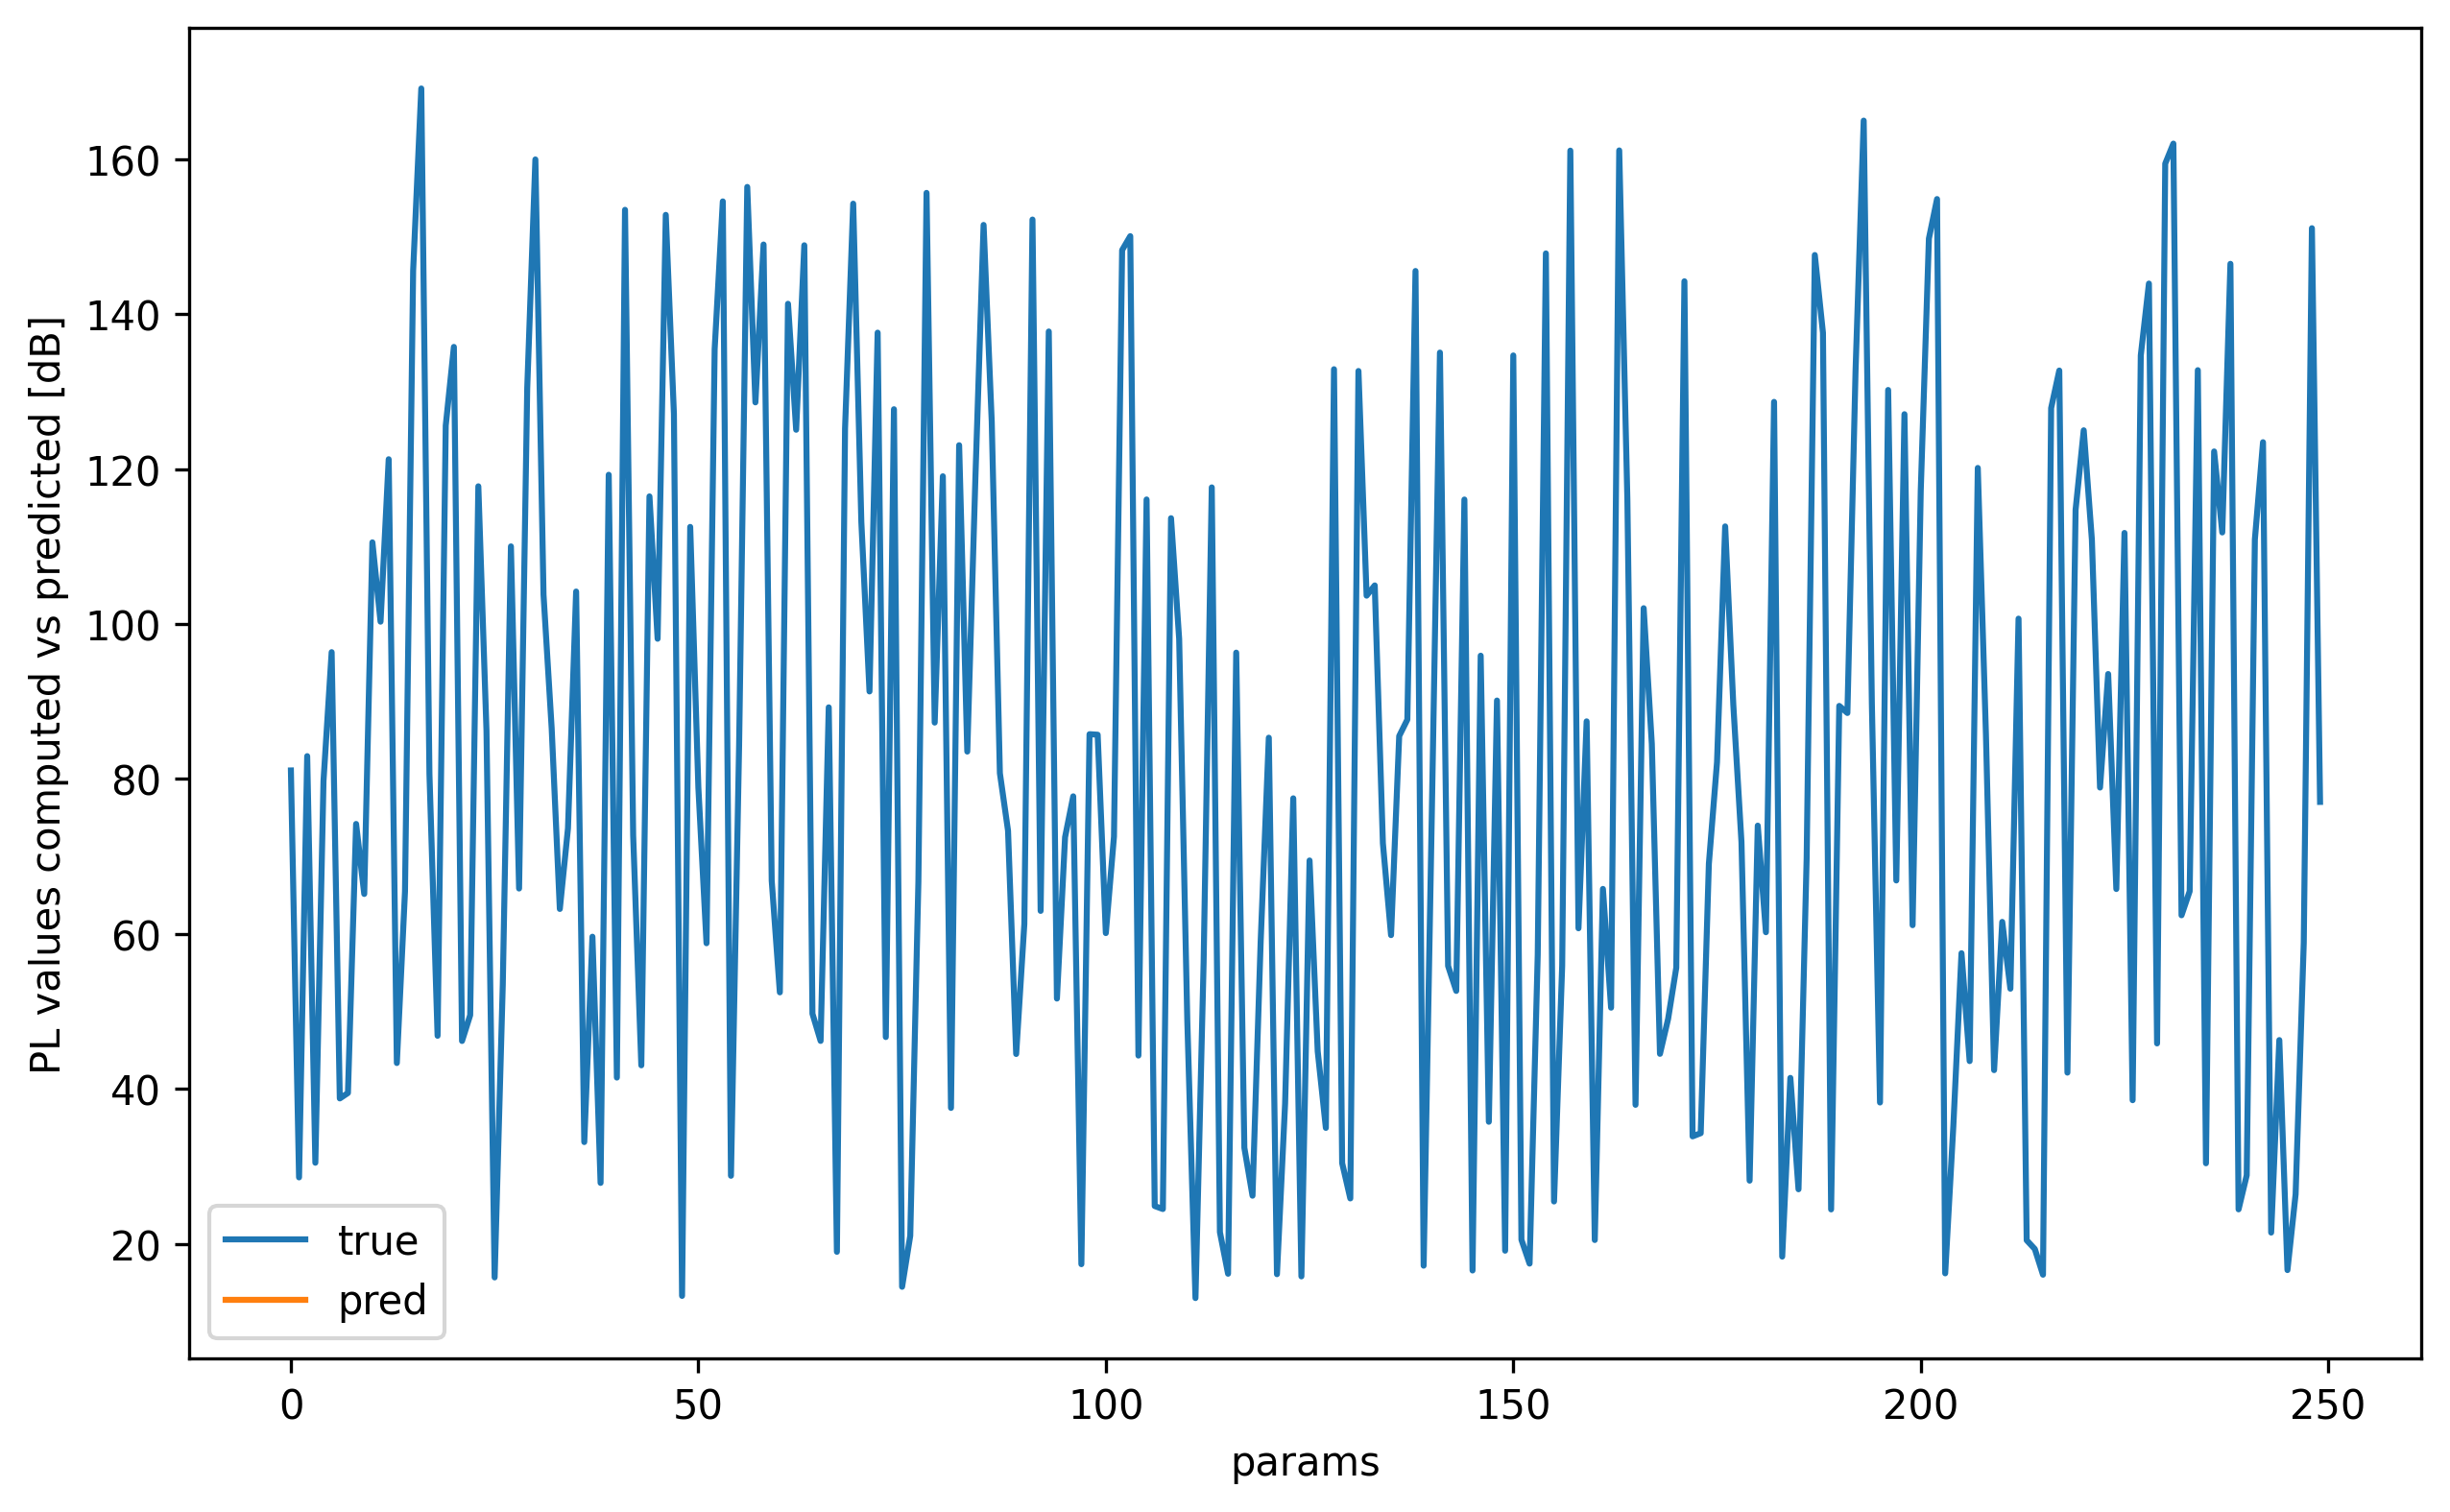

In [5]:

# we re-train the KAN architecture with the explainable symbolic approximation as the weights on thee edges 
# change compared to the model with splines 

model.fit(dataset, opt="LBFGS", steps=300, lamb=0.000002, lamb_entropy=2.);
eval_kan(model, dataset)


In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['figure.dpi'] = 300


# Store the training and test losses for each grid size for later plotting.
tr_losses = []
te_losses = []
plot_grids = []
plot_steps = []
plot_lambs = []
tr_maes = []
tr_mses = []
tr_mapes = []
tr_r2s = []

train_losses = []
test_losses = []

# Thee parameters for the KAN model.
grids = np.array([5, 8, 10, 15, 20, 30, 40, 50])
steps = np.array([50, 100, 200, 300])
k = 3
lamb = np.array([0.02, 0.002, 0.0002, 0.00002])

for g in range(grids.shape[0]):
    for s in range(steps.shape[0]):
        for l in range(lamb.shape[0]):
            model= KAN(
                width=[6,6,1],
                grid=grids[g], 
                k=3, 
                seed=42, 
                device=device, 
            ) 
            
            print(f"Grid size: {grids[g]}, steps {steps[s]}, {lamb[l]}")
            results = model.fit(dataset, opt="LBFGS", lamb=lamb[l], steps=steps[s], lamb_entropy=2.)
            
            train_losses += results['train_loss']
            test_losses += results['test_loss']
            #print(np.array(train_losses).mean())

            tr_mse, tr_rmse, tr_mae, tr_mape, tr_r2 = eval_kan(model, dataset);
            #te_mse, te_rmse, te_mae, te_mape, te_r2 = eval_kan(model, validation_data);

            plot_grids.append(grids[g])
            plot_steps.append(steps[s])
            plot_lambs.append(lamb[l])
            print(plot_lambs)
            
            tr_losses.append(np.array(train_losses).mean())
            te_losses.append(np.array(test_losses).mean())
            tr_maes.append(tr_mae)
            tr_mses.append(tr_mse)
            tr_mapes.append(tr_mape)
            tr_r2s.append(tr_r2)


checkpoint directory created: ./model
saving model version 0.0
Grid size: 5, steps 50, 0.002


| train_loss: 2.29e+01 | test_loss: 2.22e+01 | reg: 1.02e+02 | : 100%|█| 50/50 [00:05<00:00,  9.57it


saving model version 0.1
MAE: 17.1282
MSE: 456.0080
MAPE: 34.3980
R²: 0.7614
RMSE: 21.3543
[np.float64(0.002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 5, steps 50, 0.0002


| train_loss: 1.71e+01 | test_loss: 1.78e+01 | reg: 1.65e+02 | : 100%|█| 50/50 [00:06<00:00,  7.92it


saving model version 0.1
MAE: 13.3439
MSE: 305.1282
MAPE: 28.7880
R²: 0.8403
RMSE: 17.4679
[np.float64(0.002), np.float64(0.0002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 5, steps 50, 2e-05


| train_loss: 2.27e+01 | test_loss: 2.36e+01 | reg: 1.49e+02 | : 100%|█| 50/50 [00:06<00:00,  7.72it


saving model version 0.1
MAE: 18.3282
MSE: 526.0444
MAPE: 38.0140
R²: 0.7247
RMSE: 22.9357
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 5, steps 100, 0.002


| train_loss: 2.29e+01 | test_loss: 2.22e+01 | reg: 1.02e+02 | : 100%|█| 100/100 [00:07<00:00, 12.99


saving model version 0.1
MAE: 17.1282
MSE: 456.0080
MAPE: 34.3980
R²: 0.7614
RMSE: 21.3543
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 5, steps 100, 0.0002


| train_loss: 1.61e+01 | test_loss: 1.64e+01 | reg: 1.68e+02 | : 100%|█| 100/100 [00:10<00:00,  9.92


saving model version 0.1
MAE: 12.4060
MSE: 261.4879
MAPE: 27.9892
R²: 0.8632
RMSE: 16.1706
[np.float64(0.002), np.float64(0.0002), np.float64(2e-05), np.float64(0.002), np.float64(0.0002)]
checkpoint directory created: ./model
saving model version 0.0
Grid size: 5, steps 100, 2e-05


| train_loss: 5.16e+01 | test_loss: 5.12e+01 | reg: 4.59e+01 | :   2%| | 2/100 [00:00<00:16,  5.80it

In [12]:
plot_gids_steps_lambda_loss(plot_grids, plot_steps, plot_lambs, tr_losses, "Train Loss")
plot_gids_steps_lambda_loss(plot_grids, plot_steps, plot_lambs, te_losses, 'Test Loss')
plot_gids_steps_lambda_loss(plot_grids, plot_steps, plot_lambs, tr_maes, 'MAE')
plot_gids_steps_lambda_loss(plot_grids, plot_steps, plot_lambs, tr_mses, 'MSE')
plot_gids_steps_lambda_loss(plot_grids, plot_steps, plot_lambs, tr_mapes, 'MAPE')
plot_gids_steps_lambda_loss(plot_grids, plot_steps, plot_lambs, tr_r2s, 'R2')

NameError: name 'plot_grids' is not defined

In [ ]:
# Plot the training and test losses.
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')